<a href="https://colab.research.google.com/github/shanOnline99/Machine-Learning/blob/main/LAB01_2019E107.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Load the breast cancer dataset (Breast Cancer Wisconsin (Diagnostic)
Data Set) from scikit-learn datasets module.

In [ ]:
from sklearn.datasets import load_breast_cancer
# Load the breast cancer dataset into breast_cancer
breast_cancer = load_breast_cancer()

2. Laern the data. Find the,
 shape of the data.
 Sample count per class.
 Features in the dataset.
 Other properties of the dataset.

In [ ]:
#shape of the data
shape = breast_cancer.data.shape
print(shape)

(569, 30)


In [ ]:
import numpy as np
#sample count per class
sample_count = dict(zip(breast_cancer.target_names, np.bincount(breast_cancer.target)))
print("sample_count_per_class: ",sample_count)

sample_count_per_class:  {'malignant': 212, 'benign': 357}


In [ ]:
#Features in the dataset
print("Features in the dataset: ",breast_cancer.feature_names)

Features in the dataset:  ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [ ]:
#Other properties of the dataset
print(breast_cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

3. Divide your data into two sets, feature values (X) and target values (y).

In [ ]:
X = breast_cancer.data # Feature values
y = breast_cancer.target # Target values

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
k = 5

knn_whole = KNeighborsClassifier(n_neighbors=k) # Fit the model on whole data

knn_whole.fit(X, y) # Train the model

y_pred_whole = knn_whole.predict(X) # Test the model on the same data

# Print the score of the model
print("Score_of_the_whole_data_model: ", knn_whole.score(X, y))

Score_of_the_whole_data_model:  0.9472759226713533


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2) # Divide the whole data into 80% train and 20% test

knn = KNeighborsClassifier(n_neighbors=k) # Create the knn model with k = 5

knn.fit(X_train, y_train) # Train the model

y_pred = knn.predict(X_test) # Test the model on the test data

# Print the score of the new model
print("Score_of_the_split_data_model: ",knn.score(X_test, y_test))

Score_of_the_split_data_model:  0.9122807017543859


5. Do the following experiment on the split data. Change the number
of neighbors from 1 to 8 and see how training accuracy and testing
accuracy are changing with number of neighbors.

In [ ]:
n_neighbors_values = list(range(1, 9))
training_accuracies = []
testing_accuracies = []

for k in n_neighbors_values:
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train, y_train)

# Accuracy of the k-NN classifier on the training data
        training_accuracy = knn.score(X_train, y_train)
        training_accuracies.append(training_accuracy)

# Accuracy of the k-NN classifier on the testing data
        testing_accuracy = knn.score(X_test, y_test)
        testing_accuracies.append(testing_accuracy)

print(f"Training_Accuracies: {training_accuracies}\n")
print(f"Testing_Accuracies: {testing_accuracies}\n")

Training_Accuracies: [1.0, 0.967032967032967, 0.9582417582417583, 0.9538461538461539, 0.9516483516483516, 0.9494505494505494, 0.9472527472527472, 0.9516483516483516]

Testing_Accuracies: [0.8947368421052632, 0.9122807017543859, 0.9122807017543859, 0.9122807017543859, 0.9122807017543859, 0.9122807017543859, 0.9035087719298246, 0.9122807017543859]



6. Plot both the accuracy values on the same graph and see the changes.

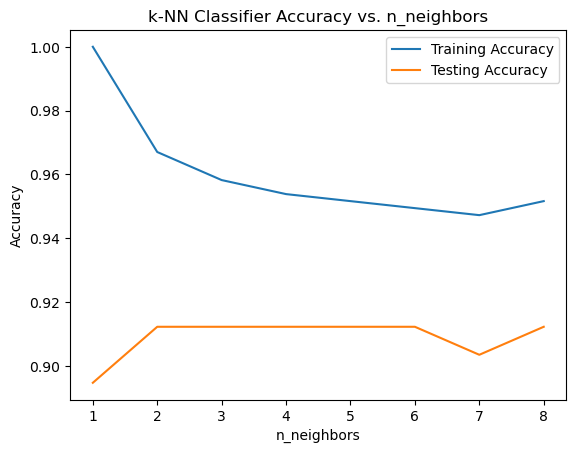

In [ ]:
import matplotlib.pyplot as plt

plt.plot(n_neighbors_values, training_accuracies, label="Training Accuracy")
plt.plot(n_neighbors_values, testing_accuracies, label="Testing Accuracy")
plt.xlabel("n_neighbors")
plt.ylabel("Accuracy")
plt.title("k-NN Classifier Accuracy vs. n_neighbors")
plt.legend()
plt.show()

7. Select the best number of neighbors from the above graph.

In [ ]:
# best number of neighbor is 6

8. Fit a nearest neighbor model with that value and print the score.

In [ ]:
k =6
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)
print(f"Score of the model for k={k}: {knn.score(X_test, y_test)}")

Score of the model for k=6: 0.9122807017543859


9. Calculate the root mean squared value of your model.

In [ ]:
from sklearn.metrics import mean_squared_error

y_pred = knn.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error of the model: ", rmse)

Root Mean Squared Error of the model:  0.2961744388795462


10. Plot a confusion matrix and interpret the result.

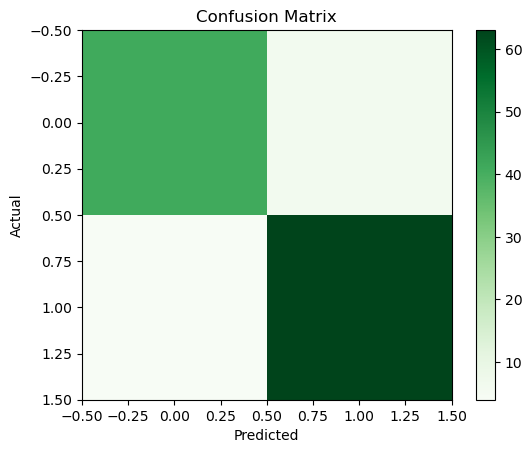

In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
plt.figure()
plt.imshow(cm, cmap="Greens")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.colorbar()
plt.show()